# Doing Math With Vectors

If vectors were just for storing data, they wouldn't be super useful. Thankfully, they're not! 

## Math with Scalars

One of the great things about vectors is that we can use them to do math in a very concise manner. For example, if you try and do a math mathematical operation between a vector and either a scalar number or another vector of length one, numpy will just repeat the mathematical operation with each entry in the longer vector (a behavior called "broadcasting"). This is a very valuable trick -- since we often use vectors to store a collection of measurements of the same phenomenon (e.g. the salaries of employees, the dollar value of sales, temperature measurements, etc.), it is also the case that we often want to apply the same mathematical function to all of the entries in a vector.  


In [1]:
import numpy as np

# Suppose we are working with data on car sales,
# and we have the value of all the cars we sold last year

sales = np.array([34_255, 27_222, 42_250, 12_000])
sales


array([34255, 27222, 42250, 12000])

In [2]:
# Now suppose that for every car we sell,
# we have to pay a sales tax of 10%.
# How could we calculate the after-tax revenue
# from each of the sales?

# Simple!
after_tax = sales * 0.90

In [3]:
# And suppose we also had to pay a
# flat fee of 500 dollars to process each
# sale. Now what would our final revenue be?

final = after_tax - 500
final

array([30329.5, 23999.8, 37525. , 10300. ])

In addition to working with obvious math functions (e.g. `+`, `-`, `*`), this logic also applies to logical comparisons like `>`, `<`, `==`, etc. For example, suppose we wanted to identify sales for more than $30,000. We could do:

In [4]:
final > 30_000

array([ True, False,  True, False])

### Functions

The same thing happens with most functions -- the function gets applied to each entry. Suppose we wanted to round off all of these numbers to the nearest dollar:

In [5]:
# Round to the nearest dollar
np.round(final)


array([30330., 24000., 37525., 10300.])

## Math with Equal-Length Vectors

But we can do more than just repeat the same operation for each entry. If you have two vectors of the same length, mathematical operations will occur "element-wise", meaning the mathematical operation will be applied to the two 1st entries, then the two 2nd entries, then the two 3rd entries, etc. For example, if we were to add our vector of the values 0 through 4 to a vector with two 0s, then two 1s, then a 0 numpy would do the following:

```
0    +     0    =    0  +  0    =    0 
1    +     0    =    1  +  0    =    1 
2    +     1    =    2  +  1    =    3 
3    +     1    =    3  +  1    =    4 
4    +     0    =    4  +  0    =    4 
```

(Obviously, numpy likes to print out vectors sideways, but personally I think of them as column vectors, so have written them out like that here).


In [6]:
# Two vectors with the same number of elements 
numbers = np.arange(5)
numbers


array([0, 1, 2, 3, 4])

In [7]:
numbers2 = np.array([0, 0, 1, 1, 0])
numbers2


array([0, 0, 1, 1, 0])

In [8]:
numbers3 = numbers2 + numbers
numbers3


array([0, 1, 3, 4, 4])

How might this be helpful? Suppose that in addition to information about the sale price of all of the cars we sold last year, we also had data on what those cars cost us (the dealership):

In [9]:
prices = np.array([27_750, 23_500, 39_200, 6_700])
prices

array([27750, 23500, 39200,  6700])

Now we can combine the after-tax revenue we made from each sale with what the cars we sold cost the dealership to estimate the net profit from each sale:

In [10]:
final - prices

array([ 2579.5,   499.8, -1675. ,  3600. ])

Cool! As we can see, we made substantially more on some of those sales than others. In fact, from this we can see that we need to have a discussion with whoever negotiated the third sale, since we ended up *losing* $1,675 on that sale!

### Other Shapes

We've now seen how we can do math with numpy vectors + scalars, numpy vectors + other vectors of length 1, and numpy vectors + other vectors of the same length. But if you try an operation with two vectors of different length, and one *isn't* of size one, you get an error that, for the moment, will feel a little cryptic but which we'll dive into in detail soon:

```python
vect1 = np.array([1, 2, 3])
vect2 = np.array([1, 2, 3, 4, 5, 6])
vect1 + vect2

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/var/folders/tj/s8f2_ks15h315z5thvtnhz8r0000gp/T/ipykernel_30350/1706447136.py in <module>
      1 vect1 = np.array([1, 2, 3])
      2 vect2 = np.array([1, 2, 3, 4, 5, 6])
----> 3 vect1 + vect2

ValueError: operands could not be broadcast together with shapes (3,) (6,) 
```

## Vectorized Code / Vectorization

It's worth quickly noting that the way that numpy broadcasts mathematical operations across vectors results in a style of programming that is relatively unique to data science: vectorization / writing vectorized code.

If you ask the average programmer to take two vectors `1, 2, 3, 4, 5` and `6, 7, 8, 9, 10` and add the first number of the first vector to the first number the second vector, then add the second number of the first vector to the second number of the second factor, etc., you would probably get a loop that looks something like this:

In [11]:
# Either this or you'd get lists
vector1 = np.array([1, 2, 3, 4, 5])
vector2 = np.array([6, 7, 8, 9, 10])

results = list()
for i in range(len(vector1)):
    # Note you can pull items from a vector like 
    # items from a list with `[]`. We'll talk more
    # about that in an upcoming reading.
    summation = vector1[i] + vector2[i]
    results.append(summation)


And this code isn't *wrong*. But hopefully it's easy to see how much more verbose this is than `vector1 + vector2`. And because we do this type of operation *all the time* in data science, this ability avoid writing explicit loops over the entries in a vector is a *really* important feature of numpy. It makes code much, much easier to read and understand. In fact, as we'll discuss at length in a later reading, it is also a style of programming that allows numpy to run much more quickly then it would if we wrote for loops all the time.

So if you're reading all this and saying "But I just want to write a loop!", please bear with us and try to embrace this style of programming when working with numpy arrays -- we promise, there's a reason it's how nearly all data science code is written!

## Summarizing Vectors 

In the previous examples, we did mathematical operations that acted on the individual entries in a vector, but another type of mathematical operation we sometimes do with vectors is to calculate a property of the entries *as a group*. For example, if we had a vector where each element was a person's height, we might want to know the height of the tallest person in the vector, the height of the shortest person in the vector, the median or mean height of the group, or even the standard deviation of heights. 

For that, numpy provides a *huge* range of numeric functions:

In [12]:
# Toy height vector
# (Obviously you could easily find the tallest, shortest, etc.
# in this data set without numpy -- this is just an example!)
heights_in_cm = np.array([155, 171, 162, 170, 171])

# Tallest
np.max(heights_in_cm)

171

In [13]:
# Shortest
np.min(heights_in_cm)

155

In [14]:
# Median
np.median(heights_in_cm)

170.0

In [15]:
# Standard deviation
np.std(heights_in_cm)

6.368673331236263

Here's a short (very incomplete!) list of these kinds of functions:

```python
len(numbers) # number of elements 
np.max(numbers) # maximum value
np.min(numbers) # minimum value
np.sum(numbers) # sum of all entries
np.mean(numbers) # mean
np.median(numbers) # median
np.var(numbers) # variance
np.sd(numbers) # standard deviation
np.quantile(numbers, q) # the qth quintile of numbers
```

**Don't** worry about memorizing these or anything -- basically, you just need to have a sense of the kinds of things you can do with functions, and if you ever need one can can't remember the name of the function, you can google "numpy [what you want to do]" to get the specific function name, or check out the [numpy documentation](https://numpy.org/doc/stable/reference/routines.math.html).

And of course, these different types of manipulation can also be combined! For example, supposed we wanted to know the number of sales that generated more than $30,000 in revenue. First, we could do the same manipulation we did up top:

In [16]:
large_sales = final > 30_000
large_sales

array([ True, False,  True, False])

Then we can sum up that vector (remember: `True` in Python is treated like `1` and `False` is treated like `0` when passed to functions like `np.sum()` and `np.mean()`):

In [17]:
np.sum(large_sales)

2

## Visualizing Your Data

Another powerful tool for summarizing data is to visualize it in a plot. In fact, visualizations are so power and important to data science that we have an entire module on them later in this specialization in which we'll discuss them in great detail. For the moment, though, we do want to briefly introduce you to a simple but power way of summarizing the data in a vector: the histogram. 

A histogram creates a visual representation of the distribution of data in a vector by showing vertical bars whose height corresponds to the number of observations with values in a certain range. To illustrate, consider the following histogram of our `heights_in_cm` data. The vector looks like:

In [18]:
heights_in_cm

array([155, 171, 162, 170, 171])

And so the corresponding histogram—created with a function called `hist` we import from the `pyplot` module in `matplotlib` library (again, don't worry about the details of where we found this function—we'll talk about that at length in a later section!)—looks like this:

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 3.]),
 array([155. , 156.6, 158.2, 159.8, 161.4, 163. , 164.6, 166.2, 167.8,
        169.4, 171. ]),
 <BarContainer object of 10 artists>)

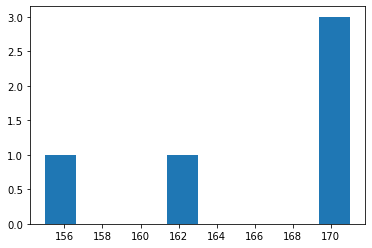

In [19]:
from matplotlib import pyplot as plt
plt.hist(heights_in_cm)

Here we can see that our plotting library has divided our data into 10 evenly spaced bins and then counted the number of observations in each bin. There are no observations in most bins, so they don't have bars you can see, but we see a bar reaching up to 1 at about 156 because there's one observation in the bin centered about there (the observation 155), a bar reaching up to 1 at 162 because there's one observation there (the observation of 162), and the bar reaches to *three* in the bin around 170 because there are three observations (170, 171, and 171) that fall in that bucket.

Together, this plot can be used to give us a sense of the overall *distribution* of values in our data—namely, most of our observations are at the high end of our distribution (near 170), with a couple observations at lower values. 

Of course, in this case we could easily see this just by looking at the vector itself, but that won't be true with larger dataset. To illustrate, let's load a vector with the random sample of household incomes from the United States Census we'll be working with in a later exercise:

In [20]:
income = np.loadtxt("data/us_household_incomes.txt")
len(income)

933695

This dataset has almost 1 million observations, so we clearly can't just look at the vector to get a sense of the overall distribution of values. But with a histogram:

(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

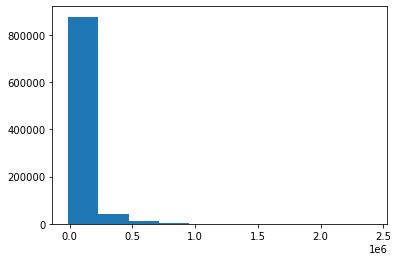

In [21]:
plt.hist(income)

We can quickly see that the *vast* majority of households have incomes that are below $500,000 (the `1e6` on the x-axis means that you have to multiply all the values along the bottom (along on the x-axis) by 1,000,000 to get the actual value, so 0.5 corresponds to 500,000), but there are a very small number of households earning truly huge amounts of money. Indeed, the highest value in this data is...

In [22]:
np.max(income)

2410903.0

$2,410,903!

(To be clear, that's also nowhere near the highest real income in the US. First, this does not include things like increases in the value of stocks a person owns as "income", which is where most increases in wealth for people like Jeff Bezos and Elon Musk come from. And second, this data comes from a 1% sample of all households in the US, which makes it poorly suited to characterizing extreme values in data distributed like this). 

If we want more resolution, we can also make the bins used by the histogram smaller with the `bins` keyword:

(array([3.34466e+05, 3.42563e+05, 1.46143e+05, 5.43700e+04, 2.19770e+04,
        1.02090e+04, 6.18500e+03, 5.13200e+03, 4.28800e+03, 2.90900e+03,
        1.64500e+03, 1.32900e+03, 8.22000e+02, 4.93000e+02, 3.62000e+02,
        2.44000e+02, 1.61000e+02, 1.04000e+02, 8.30000e+01, 5.00000e+01,
        3.10000e+01, 2.50000e+01, 3.90000e+01, 2.20000e+01, 1.40000e+01,
        7.00000e+00, 5.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -16942.   ,   43754.125,  104450.25 ,  165146.375,  225842.5  ,
         286538.625,  347234.75 ,  407930.875,  468627.   ,  529323.125,
         590019.25 ,  650715.375,  711411.5  ,  772107.625,  832803.75 ,
         893499.875,  954196.   , 1014892.125, 1075588.25 , 1136284.375,
        1196980.5  , 1257676.625, 1318372.75 , 1379068.875, 1439765.   ,
        1500461.125, 1561157.25 , 1621853.375, 16

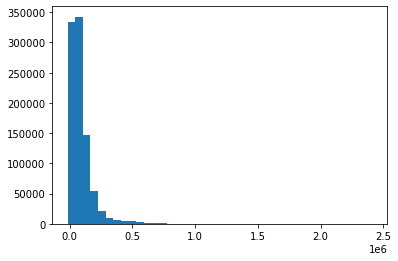

In [23]:
plt.hist(income, bins=40)

In a later exercise we'll also talk about how to subset our vector (drop some entries and keep others) to make it easier to plot a histogram that just focuses on values below, say, $1,000,000 to also make our histograms more useful. For the moment, though, I hope this has done a good job of illustrating for you the value of histograms for getting a "feel" for your data!

## Exercises

1. Suppose the following were the heart rates reported by your Fitbit over the day: `68, 65, 77, 110, 160, 161, 162, 161, 160, 161, 162, 163, 164, 163, 162, 100, 90, 97, 72, 60, 70`. Put these numbers into a numpy array.
2. A commonly used measure of health is a person's *resting heart rate* (basically, how low does your heart rate go when you aren't doing anything). Find the minimum heart rate you experienced over the day.
3. A one measure of exercise intensity is your maximium heart rate -- suppose that during the day these data were collected, you are deliberately exercising. Find your maximum heart rate.
4. Let's try to calculate the share of readings that were taken when you were exercising. First, create a new vector that takes on the value of `True` when your heart rate is above 120, and `False` when your heart rate is below 120.
5. Now use a summarizing function to calculate the share of observations for which your heart rate was above 120!